<a href="https://colab.research.google.com/github/Rahmamouradsayed/deep-learning-project-/blob/main/Project_Handwritten_signature_model_simease_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras
import os
import tensorflow as tf

In [ ]:
!mkdir Train
!mkdir Test

!mkdir Train/Fake
!mkdir Train/Real

!mkdir Test/Fake
!mkdir Test/Real

In [ ]:
!pip install kaggle

from google.colab import files
files.upload()

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

Saving signature-verification-dataset-metadata.json to signature-verification-dataset-metadata.json


In [ ]:
!kaggle datasets download -d robinreni/signature-verification-dataset
!unzip signature-verification-dataset.zip -d /content/

Dataset URL: https://www.kaggle.com/datasets/robinreni/signature-verification-dataset
License(s): CC0-1.0
 98% 588M/601M [00:06<00:00, 77.0MB/s]
100% 601M/601M [00:06<00:00, 95.4MB/s]
Archive:  signature-verification-dataset.zip
  inflating: /content/sign_data/sign_data/test/049/01_049.png  
  inflating: /content/sign_data/sign_data/test/049/02_049.png  
  inflating: /content/sign_data/sign_data/test/049/03_049.png  
  inflating: /content/sign_data/sign_data/test/049/04_049.png  
  inflating: /content/sign_data/sign_data/test/049/05_049.png  
  inflating: /content/sign_data/sign_data/test/049/06_049.png  
  inflating: /content/sign_data/sign_data/test/049/07_049.png  
  inflating: /content/sign_data/sign_data/test/049/08_049.png  
  inflating: /content/sign_data/sign_data/test/049/09_049.png  
  inflating: /content/sign_data/sign_data/test/049/10_049.png  
  inflating: /content/sign_data/sign_data/test/049/11_049.png  
  inflating: /content/sign_data/sign_data/test/049/12_049.png  
  i

In [ ]:
!ls /content/

sample_data				      signature-verification-dataset.zip  Test
signature-verification-dataset-metadata.json  sign_data				  Train


In [ ]:
import os
import shutil

train_path = '/content/sign_data/train/'
test_path = '/content/sign_data/test/'

os.makedirs('/content/Train/Real', exist_ok=True)
os.makedirs('/content/Train/Fake', exist_ok=True)
os.makedirs('/content/Test/Real', exist_ok=True)
os.makedirs('/content/Test/Fake', exist_ok=True)

In [ ]:
for filename in os.listdir(train_path):
    try:
        file_path = os.path.join(train_path, filename)
        if os.path.isdir(file_path):
            continue
        if 'forg' in filename:
            shutil.copy(file_path, '/content/Train/Fake')
        else:
            shutil.copy(file_path, '/content/Train/Real')
    except Exception as e:
        print(f"Error processing file {filename}: {e}")

for filename in os.listdir(test_path):
    try:
        file_path = os.path.join(test_path, filename)
        if os.path.isdir(file_path):
            continue
        if 'forg' in filename:
            shutil.copy(file_path, '/content/Test/Fake')
        else:
            shutil.copy(file_path, '/content/Test/Real')
    except Exception as e:
        print(f"Error processing file {filename}: {e}")

train_dir = os.path.join("/content/Train/")
test_dir = os.path.join("/content/Test/")


In [ ]:
os.listdir('/content/sign_data/train/')

['033',
 '044',
 '006',
 '012_forg',
 '027_forg',
 '051_forg',
 '018_forg',
 '041_forg',
 '013',
 '016_forg',
 '030_forg',
 '048_forg',
 '064',
 '059_forg',
 '014',
 '049_forg',
 '036',
 '052_forg',
 '057',
 '016',
 '036_forg',
 '067_forg',
 '030',
 '046_forg',
 '056',
 '041',
 '029_forg',
 '062',
 '069',
 '003',
 '050_forg',
 '068',
 '024_forg',
 '025',
 '040',
 '050',
 '014_forg',
 '019_forg',
 '063',
 '033_forg',
 '025_forg',
 '042',
 '020',
 '021_forg',
 '047',
 '009_forg',
 '052',
 '047_forg',
 '038_forg',
 '043_forg',
 '065_forg',
 '026',
 '053',
 '034',
 '049',
 '019',
 '067',
 '064_forg',
 '039_forg',
 '058_forg',
 '069_forg',
 '012',
 '024',
 '061',
 '046',
 '060',
 '013_forg',
 '039',
 '054',
 '028_forg',
 '037',
 '043',
 '031_forg',
 '056_forg',
 '038',
 '051',
 '057_forg',
 '023_forg',
 '026_forg',
 '055',
 '060_forg',
 '045',
 '055_forg',
 '048',
 '062_forg',
 '058',
 '066_forg',
 '015',
 '020_forg',
 '059',
 '022',
 '066',
 '021',
 '031',
 '028',
 '001',
 '034_forg',
 '00

In [ ]:
for folder in os.listdir(train_path):
    folder_path = os.path.join(train_path, folder)
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)
            if 'forg' in folder:
                shutil.copy(file_path, '/content/Train/Fake')
            else:
                shutil.copy(file_path, '/content/Train/Real')

for folder in os.listdir(test_path):
    folder_path = os.path.join(test_path, folder)
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)
            if 'forg' in folder:
                shutil.copy(file_path, '/content/Test/Fake')
            else:
                shutil.copy(file_path, '/content/Test/Real')

In [ ]:
print(os.listdir('/content/Train/Real'))
print(os.listdir('/content/Train/Fake'))
print(os.listdir('/content/Test/Real'))
print(os.listdir('/content/Test/Fake'))

['004_09.PNG', '07_036.png', '10_031.png', '06_018.png', '01_022.png', '12_020.png', '05_020.png', '08_020.png', '06_030.png', '11_055.png', '015_09.PNG', '11_041.png', '003_16.PNG', '09_017.png', '009_07.PNG', '015_20.PNG', '06_069.png', '003_24.PNG', '06_053.png', '03_026.png', '01_058.png', '02_031.png', '12_058.png', '001_02.PNG', '09_056.png', '02_059.png', '002_20.PNG', '07_013.png', '11_036.png', '01_036.png', '04_049.png', '009_21.PNG', '02_038.png', '10_052.png', '05_017.png', '003_17.PNG', '01_021.png', '07_021.png', '05_025.png', '02_054.png', '03_054.png', '08_033.png', '07_052.png', '014_12.PNG', '003_19.PNG', '05_069.png', '012_16.PNG', '09_031.png', '014_10.PNG', '06_036.png', '07_039.png', '002_10.PNG', '001_24.PNG', '10_067.png', '12_060.png', '014_08.PNG', '02_060.png', '03_018.png', '01_041.png', '10_013.png', '003_06.PNG', '04_043.png', '10_045.png', '10_069.png', '12_067.png', '07_049.png', '01_030.png', '11_043.png', '015_15.PNG', '11_035.png', '02_055.png', '02_0

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=60,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    channel_shift_range=20.0,
    fill_mode='reflect'
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=128,
    class_mode='binary'
)

Found 1649 images belonging to 2 classes.


In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(200, 200),
    batch_size=64,
    class_mode='binary'
)

Found 500 images belonging to 2 classes.


Label :  1.0


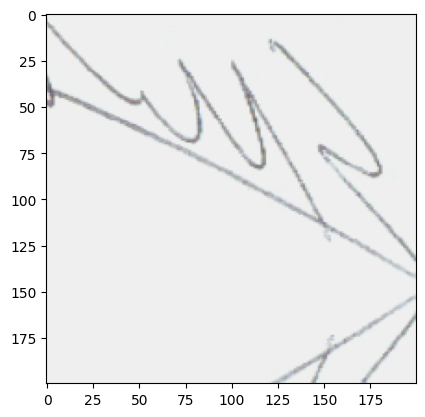

In [ ]:
plt.imshow(train_generator[0][0][5])
print("Label : ",train_generator[0][1][5])

Label :  0.0


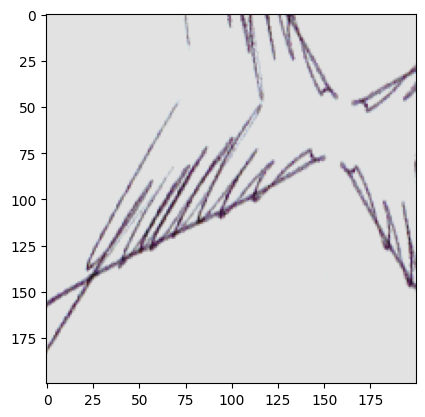

In [ ]:
plt.imshow(train_generator[0][0][60])
print("Label : ",train_generator[0][1][60])

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input, Dense, Flatten, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout,BatchNormalization, GlobalAveragePooling2D
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
def create_pairs_from_directory(generator, directory, batch_size):
    image1 = []
    image2 = []
    labels = []

    for batch in generator:
        images, labels_batch = batch
        for i in range(len(images) - 1):
            label1 = np.argmax(labels_batch[i]) if labels_batch[i].ndim > 0 else labels_batch[i]
            label2 = np.argmax(labels_batch[i + 1]) if labels_batch[i + 1].ndim > 0 else labels_batch[i + 1]

            image1.append(images[i])
            image2.append(images[i + 1])
            labels.append(1 if label1 == label2 else 0)

        if len(image1) >= batch_size:
            break

    image1 = np.array(image1)
    image2 = np.array(image2)
    labels = np.array(labels)
    return image1, image2, labels

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/sign_data/train/',
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical')

Found 1649 images belonging to 128 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
    '/content/sign_data/test/',
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical')

Found 500 images belonging to 42 classes.


In [ ]:
training_image1, training_image2, training_labels = create_pairs_from_directory(train_generator, '/content/sign_data/train/', batch_size=128)
testing_image1, testing_image2, testing_labels = create_pairs_from_directory(test_generator, '/content/sign_data/test/', batch_size=64)

In [ ]:
input_shape= (200, 200, 3)

In [ ]:
input_a = Input(shape=input_shape)
input_b = Input(shape=input_shape)

In [ ]:
pretrained_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
def build_shared_network(pretrained_model):
    x = pretrained_model.output
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    return Model(pretrained_model.input, x)

In [ ]:
shared_network = build_shared_network(pretrained_model)

In [ ]:
embedding_a = shared_network(input_a)
embedding_b = shared_network(input_b)

In [ ]:
l1_distance = Lambda(lambda tensors: K.abs(tensors[0] - tensors[1]))([embedding_a, embedding_b])
x = Dense(128, activation='relu')(l1_distance)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(1, activation='sigmoid')(x)

In [ ]:
siamese_model = Model(inputs=[input_a, input_b], outputs=output)

In [ ]:
for layer in pretrained_model.layers[-20:]:
    layer.trainable = True

In [ ]:
siamese_model.compile(optimizer=Adam(learning_rate=0.00005), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
siamese_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 200, 200, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, 200, 200, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ functional (Functional)   │ (None, 128)            │     24,857,792 │ input_layer[0][0],     │
│                           │                        │                │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda (Lambda)           │ (None, 128)            │              0 │ functional[0][0],      │
│                           │                        │                │ functional[1][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 128)            │         16,512 │ lambda[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 128)            │              0 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 64)             │          8,256 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 64)             │              0 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 1)              │             65 │ dropout_2[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 24,882,625 (94.92 MB)

 Trainable params: 24,829,505 (94.72 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
history = siamese_model.fit(
    [training_image1, training_image2], training_labels,
    epochs=20,
    batch_size=16,
    validation_data=([testing_image1, testing_image2], testing_labels),
    callbacks=[early_stopping]
)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 152s 7s/step - accuracy: 0.8563 - loss: 0.2784 - val_accuracy: 1.0000 - val_loss: 0.6505
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 33s 353ms/step - accuracy: 0.9705 - loss: 0.1401 - val_accuracy: 1.0000 - val_loss: 0.6127
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 337ms/step - accuracy: 0.9501 - loss: 0.1687 - val_accuracy: 1.0000 - val_loss: 0.6012
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 341ms/step - accuracy: 0.9777 - loss: 0.0939 - val_accuracy: 1.0000 - val_loss: 0.5900
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 352ms/step - accuracy: 0.9898 - loss: 0.0403 - val_accuracy: 1.0000 - val_loss: 0.5784
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 344ms/step - accuracy: 0.9982 - loss: 0.0275 - val_accuracy: 1.0000 - val_loss: 0.5530
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 345ms/step - accuracy: 0.9870 - loss: 0.0431 - val_accuracy: 1.0000 - val_loss: 0.5248
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 336ms/step - accuracy: 0.9731 - loss: 0.0470 - val_accuracy: 1.

In [ ]:
test_loss, test_accuracy = siamese_model.evaluate([testing_image1, testing_image2], testing_labels, batch_size=64)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 5s/step - accuracy: 1.0000 - loss: 0.1024
Test Loss: 0.1026001051068306
Test Accuracy: 1.0


In [ ]:
from google.colab import files
files.upload()

Saving handwritten-signatures-metadata.json to handwritten-signatures-metadata.json


{'handwritten-signatures-metadata.json': b'{"@context":{"@language":"en","@vocab":"https://schema.org/","citeAs":"cr:citeAs","column":"cr:column","conformsTo":"dct:conformsTo","cr":"http://mlcommons.org/croissant/","data":{"@id":"cr:data","@type":"@json"},"dataBiases":"cr:dataBiases","dataCollection":"cr:dataCollection","dataType":{"@id":"cr:dataType","@type":"@vocab"},"dct":"http://purl.org/dc/terms/","extract":"cr:extract","field":"cr:field","fileProperty":"cr:fileProperty","fileObject":"cr:fileObject","fileSet":"cr:fileSet","format":"cr:format","includes":"cr:includes","isEnumeration":"cr:isEnumeration","jsonPath":"cr:jsonPath","key":"cr:key","md5":"cr:md5","parentField":"cr:parentField","path":"cr:path","personalSensitiveInformation":"cr:personalSensitiveInformation","recordSet":"cr:recordSet","references":"cr:references","regex":"cr:regex","repeated":"cr:repeated","replace":"cr:replace","sc":"https://schema.org/","separator":"cr:separator","source":"cr:source","subField":"cr:subFi

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d divyanshrai/handwritten-signatures

Dataset URL: https://www.kaggle.com/datasets/divyanshrai/handwritten-signatures
License(s): unknown
 99% 366M/370M [00:01<00:00, 278MB/s]
100% 370M/370M [00:01<00:00, 256MB/s]


In [ ]:
import zipfile
zip_file = 'handwritten-signatures.zip'
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('handwritten-signatures')

In [ ]:
data_folder = '/content/handwritten-signatures'

In [ ]:
import os
base_path = "/content/handwritten-signatures/Dataset_Signature_Final/Dataset"

real_images_paths = []
forge_images_paths = []

for dataset in os.listdir(base_path):
    dataset_path = os.path.join(base_path, dataset)
    if os.path.isdir(dataset_path):
        real_path = os.path.join(dataset_path, "real")
        forge_path = os.path.join(dataset_path, "forge")

        if os.path.exists(real_path):
            for img in os.listdir(real_path):
                real_images_paths.append(os.path.join(real_path, img))

        if os.path.exists(forge_path):
            for img in os.listdir(forge_path):
                forge_images_paths.append(os.path.join(forge_path, img))

print("Real Images Paths:")
print(real_images_paths[:5])

print("\nForge Images Paths:")
print(forge_images_paths[:5])


Real Images Paths:
['/content/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset1/real/00204002.png', '/content/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset1/real/00101001.png', '/content/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset1/real/00903009.png', '/content/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset1/real/00703007.png', '/content/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset1/real/00500005.png']

Forge Images Paths:
['/content/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset1/forge/02100009.png', '/content/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset1/forge/02100007.png', '/content/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset1/forge/02103012.png', '/content/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset1/forge/02104005.png', '/content/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset1/forge/02101007.png']


https://www.kaggle.com/datasets/divyanshrai/handwritten-signatures




In [ ]:
from google.colab import files
files.upload()

Saving handwritten-signatures-metadata.json to handwritten-signatures-metadata.json


{'handwritten-signatures-metadata.json': b'{"@context":{"@language":"en","@vocab":"https://schema.org/","citeAs":"cr:citeAs","column":"cr:column","conformsTo":"dct:conformsTo","cr":"http://mlcommons.org/croissant/","data":{"@id":"cr:data","@type":"@json"},"dataBiases":"cr:dataBiases","dataCollection":"cr:dataCollection","dataType":{"@id":"cr:dataType","@type":"@vocab"},"dct":"http://purl.org/dc/terms/","extract":"cr:extract","field":"cr:field","fileProperty":"cr:fileProperty","fileObject":"cr:fileObject","fileSet":"cr:fileSet","format":"cr:format","includes":"cr:includes","isEnumeration":"cr:isEnumeration","jsonPath":"cr:jsonPath","key":"cr:key","md5":"cr:md5","parentField":"cr:parentField","path":"cr:path","personalSensitiveInformation":"cr:personalSensitiveInformation","recordSet":"cr:recordSet","references":"cr:references","regex":"cr:regex","repeated":"cr:repeated","replace":"cr:replace","sc":"https://schema.org/","separator":"cr:separator","source":"cr:source","subField":"cr:subFi

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d divyanshrai/handwritten-signatures

Dataset URL: https://www.kaggle.com/datasets/divyanshrai/handwritten-signatures
License(s): unknown
100% 369M/370M [00:14<00:00, 29.4MB/s]
100% 370M/370M [00:14<00:00, 26.7MB/s]


In [ ]:
import zipfile
zip_file = 'handwritten-signatures.zip'
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('handwritten-signatures')

In [ ]:
data_folder = '/content/handwritten-signatures'

In [ ]:
import os
import shutil

In [ ]:
test_path = '/content/sign_data_2/test/'

os.makedirs(os.path.join(test_path, 'Real'), exist_ok=True)
os.makedirs(os.path.join(test_path, 'Fake'), exist_ok=True)

In [ ]:
import os
base_path = "/content/handwritten-signatures/Dataset_Signature_Final/Dataset"

real_images_paths = []
forge_images_paths = []

for dataset in os.listdir(base_path):
    dataset_path = os.path.join(base_path, dataset)
    if os.path.isdir(dataset_path):
        real_path = os.path.join(dataset_path, "real")
        forge_path = os.path.join(dataset_path, "forge")

        if os.path.exists(real_path):
            for img in os.listdir(real_path):
                real_image_path = os.path.join(real_path, img)
                real_images_paths.append(real_image_path)
                shutil.move(real_image_path, os.path.join(test_path, 'Real', img))  # Move real images

        if os.path.exists(forge_path):
            for img in os.listdir(forge_path):
                forge_image_path = os.path.join(forge_path, img)
                forge_images_paths.append(forge_image_path)
                shutil.move(forge_image_path, os.path.join(test_path, 'Fake', img))  # Move forged images

print("Real Images Paths:")
print(real_images_paths[:5])

print("\nForge Images Paths:")
print(forge_images_paths[:5])

Real Images Paths:
['/content/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset1/real/00200002.png', '/content/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset1/real/00203002.png', '/content/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset1/real/00201002.png', '/content/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset1/real/01102011.png', '/content/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset1/real/01000010.png']

Forge Images Paths:
['/content/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset4/forge/00305035.png', '/content/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset4/forge/01605077.png', '/content/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset4/forge/00401063.png', '/content/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset4/forge/00303002.png', '/content/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset4/forge/03202086.png']


In [ ]:
new_test_generator = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
).flow_from_directory(
    test_path,
    target_size=(200, 200),
    batch_size=64,
    class_mode='categorical'
)

testing_image1, testing_image2, testing_labels = create_pairs_from_directory(
    new_test_generator, test_path, batch_size=64
)




Found 472 images belonging to 2 classes.


In [ ]:
predictions = siamese_model.predict([testing_image1, testing_image2])

4/4 ━━━━━━━━━━━━━━━━━━━━ 36s 9s/step


In [ ]:
from sklearn.metrics import accuracy_score

predicted_labels = (predictions > 0.5).astype(int)

accuracy = accuracy_score(testing_labels, predicted_labels)
print(f"Accuracy on new test data: {accuracy:.2f}")


Accuracy on new test data: 0.54


https://www.kaggle.com/datasets/tienen/handwritten-signature-verification

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()  # Upload the kaggle.json file


Saving handwritten-signature-verification-metadata (2).json to handwritten-signature-verification-metadata (2).json


{'handwritten-signature-verification-metadata (2).json': b'{"@context":{"@language":"en","@vocab":"https://schema.org/","citeAs":"cr:citeAs","column":"cr:column","conformsTo":"dct:conformsTo","cr":"http://mlcommons.org/croissant/","data":{"@id":"cr:data","@type":"@json"},"dataBiases":"cr:dataBiases","dataCollection":"cr:dataCollection","dataType":{"@id":"cr:dataType","@type":"@vocab"},"dct":"http://purl.org/dc/terms/","extract":"cr:extract","field":"cr:field","fileProperty":"cr:fileProperty","fileObject":"cr:fileObject","fileSet":"cr:fileSet","format":"cr:format","includes":"cr:includes","isEnumeration":"cr:isEnumeration","jsonPath":"cr:jsonPath","key":"cr:key","md5":"cr:md5","parentField":"cr:parentField","path":"cr:path","personalSensitiveInformation":"cr:personalSensitiveInformation","recordSet":"cr:recordSet","references":"cr:references","regex":"cr:regex","repeated":"cr:repeated","replace":"cr:replace","sc":"https://schema.org/","separator":"cr:separator","source":"cr:source","sub

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d tienen/handwritten-signature-verification

Dataset URL: https://www.kaggle.com/datasets/tienen/handwritten-signature-verification
License(s): CC0-1.0
 99% 2.09G/2.10G [00:28<00:00, 91.3MB/s]
100% 2.10G/2.10G [00:29<00:00, 77.7MB/s]


In [ ]:
import zipfile

zip_file = '/content/handwritten-signature-verification.zip'
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('handwritten-signature-verification')
import os
os.listdir('handwritten-signature-verification')

['assignments_07-02-2022.tsv', 'data']

In [ ]:
test_path_2='/content/handwritten-signature-verification/data/data'

In [ ]:
new_test_generator_2 = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
).flow_from_directory(
    test_path_2,
    target_size=(200, 200),
    batch_size=64,
    class_mode='categorical'
)

testing_image_3, testing_image_4, testing_labels2 = create_pairs_from_directory(
    new_test_generator_2, test_path_2, batch_size=64
)

Found 6172 images belonging to 2 classes.


In [ ]:
predictions_2 = siamese_model.predict([testing_image_3, testing_image_4])

4/4 ━━━━━━━━━━━━━━━━━━━━ 62s 17s/step


In [ ]:
from sklearn.metrics import accuracy_score

predicted_labels2 = (predictions_2 > 0.5).astype(int)

accuracy2 = accuracy_score(testing_labels2, predicted_labels2)
print(f"Accuracy on new test data: {accuracy2:.2f}")

Accuracy on new test data: 0.48
